In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
X = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df[['Species']]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=29)

In [8]:
len(X_train)

112

In [9]:
len(X_test)

38

In [16]:
model = GaussianNB()

In [17]:
model.fit(X_train,Y_train)

C:\Users\007ga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [18]:
Y_pred = model.predict(X_test)

In [28]:
Y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [19]:
model.score(X_train,Y_train)

1.0

In [20]:
model.score(X,Y)

0.9933333333333333

In [23]:
a = accuracy_score(Y_test, Y_pred)
a

0.9736842105263158

In [24]:
e = 1-a
e

0.02631578947368418

In [33]:
precision_score(Y_test, Y_pred, average='micro')

0.9736842105263158

In [34]:
recall_score(Y_test, Y_pred, average='micro')

0.9736842105263158

In [35]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 16]], dtype=int64)

In [39]:
model.predict_proba(X_test)

array([[4.89684168e-165, 4.67876347e-009, 9.99999995e-001],
       [2.45854996e-156, 1.25572139e-004, 9.99874428e-001],
       [1.11069448e-141, 9.16939386e-005, 9.99908306e-001],
       [1.16555299e-165, 2.22982430e-007, 9.99999777e-001],
       [1.00000000e+000, 6.68332235e-021, 1.57082498e-047],
       [3.11482861e-094, 9.99411581e-001, 5.88418936e-004],
       [2.24597244e-211, 3.98523956e-007, 9.99999601e-001],
       [3.14090121e-103, 9.67318534e-001, 3.26814665e-002],
       [2.01750103e-117, 9.98852977e-001, 1.14702348e-003],
       [5.34112152e-084, 9.99986844e-001, 1.31558624e-005],
       [1.58619805e-232, 7.28577255e-011, 1.00000000e+000],
       [1.00000000e+000, 4.73097509e-020, 1.22295620e-043],
       [8.05405443e-064, 1.00000000e+000, 9.82100898e-012],
       [7.13277031e-196, 1.84496698e-008, 9.99999982e-001],
       [1.37032547e-066, 9.99999981e-001, 1.88469993e-008],
       [1.48278582e-141, 1.97017287e-002, 9.80298271e-001],
       [6.15510293e-289, 3.35845556e-014

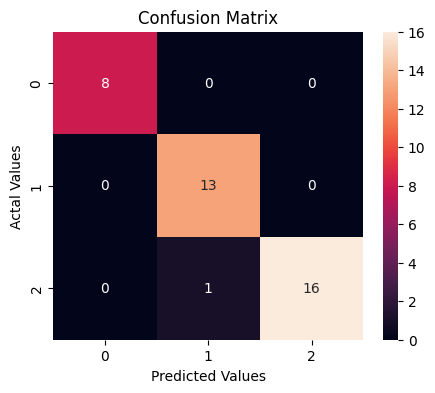

In [45]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()